In [1]:
library('tidyverse')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [24]:
nw001_dominant_tras <-
    c('CAMRDGNNRLAF', 'CAVRSLRRF', 'CVVTYTGKLIF')

https://www.10xgenomics.com/support/software/cell-ranger/7.2/hidden/cr-5p-vdj-algorithm-inktmait

- TRAV/TRAJ:
  - TRAV1-2
  - Any of TRAJ33, TRAJ20, TRAJ12

- TRBV/TRBJ
  - TRBV20
  - TRBV6

In [2]:
mait_trav_chains <-
    c('TRAV1-2')

mait_traj_chains <-
    c('TRAJ33', 'TRAJ20', 'TRAJ12')

mait_trbv_chains <-
    c('TRBV20', 'TRBV6')

In [3]:
# https://github.com/10XGenomics/enclone/blob/cellranger5.0/enclone/src/human_iNKT_CDR3.json

mait_cdr3s <-
    jsonlite::read_json('../10X_human_MAIT_CDR3.json') %>%
    map_df(~tibble(`cdr3`=unlist(.$`cdr3`), `pubmed_id`=unlist(.$`id`)))

mait_cdr3s

cdr3,pubmed_id
<chr>,<chr>
CAVNGDDYKLSF,PMC4113934
CAVRDSDYKLSF,PMC4113934
CAVSLQDYKLSF,PMC4113934
CAVRDGDYKLSF,PMC4113934
CAVRDSNYQLIW,PMC4113934
CAVRDSNYQLIQW,PMC4113934
CAAMDSNYQLIW,PMC4113934
CAVLDSNYQLIW,PMC4113934
CARSDSNYQLIW,PMC4113934


In [4]:
mait_cdr3_scores <-
    read_tsv('MAITMATCH_results_20240501.tsv') %>%
    filter(`Score` > 0.90)

mait_cdr3_scores

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 176625 Columns: 4
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Res, Sequence, MAIT_hit
dbl (1): Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Res,Sequence,MAIT_hit,Score
<chr>,<chr>,<chr>,<dbl>
Best,AVLMDSNYQLIW,CAIMDSNYQLIW,0.9557
Best,GISGSARQLTF,CAPSGSARQLTF,0.9261
Best,ILTTSGTYKYIF,CVVSSSGTYKYIF,0.9186
Best,CADRDDKIIF,CAVRRDDKIIF,0.9127
Best,CAPTGTASKLTF,CAGGTGTASKLTF,0.9067
Best,CAVGGDYKLSF,CAVSGDYKLSF,0.9607
Best,CAAGGNRLAF,CAAGGQNFVF,0.9047
Best,CAAGTGQNFVF,CAAGGQNFVF,0.9214
Best,CAAGWQNFVF,CAAGGQNFVF,0.9102


# FFPE RNA

In [5]:
read_csv('../clinical_metadata.csv')

Rows: 11 Columns: 7
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Specimen ID, Sample id, primary/recurrence, central/conventional, M...
dbl (2): age, grade

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Specimen ID,Sample id,age,primary/recurrence,grade,central/conventional,Margin
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0-20-100-00479,S10-479,NA,primary,3,central,M0
1-20-140-11208,S14-11208,69,primary,3,central,M1
1-20-150-16380,S15-16380,59,recurrence,2,central,M0
1-20-140-09996,S14-9996,103,primary,3,central,M2
1- S-17-0004703,S17-4703,44,primary,2,conventional,NA
NMS22-28934,NMS22-28934,50,primary,3,conventional,M0
0-20-080-25548,S08-25548,62,primary,NA,conventional,M2
NMS22-13453,NMS22-13453,50,primary,2,NA,NA
NMS23-00471,NMS23-471,56,primary,2,conventional,M0


In [6]:
list.files('NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result/', recursive=TRUE, full.names=TRUE) 

[1] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRAD.tsv"  
 [2] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRB.tsv"   
 [3] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRG.tsv"   
 [4] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRAD.tsv"
 [5] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRB.tsv" 
 [6] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRG.tsv" 
 [7] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRAD.tsv"
 [8] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRB.tsv" 
 [9] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRG.tsv" 
[10] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRAD.tsv"  
[11] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRB.tsv"   
[12] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRAD.tsv"  
[13] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRB.tsv"   
[14] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRG.tsv"   
[15] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRAD.tsv"  
[16] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRB.tsv"   
[17] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRG.tsv"   
[18] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRAD.tsv"  
[19] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRB.tsv"   
[20] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRAD.tsv"  
[21] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRB.tsv"   
[22] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRG.tsv"   
[23] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRAD.tsv"  
[24] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRB.tsv"   
[25] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRG.tsv"   
[26] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRAD.tsv"  
[27] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRB.tsv"   
[28] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRG.tsv"   
[29] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRAD.tsv"  
[30] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRB.tsv"   
[31] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRG.tsv"

In [7]:
all_trad_files <-
    list.files('NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result/', recursive=TRUE, pattern='.clones_TRA', full.names=TRUE)

all_trad_files

[1] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRAD.tsv"  
 [2] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRAD.tsv"
 [3] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRAD.tsv"
 [4] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRAD.tsv"  
 [5] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRAD.tsv"  
 [6] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRAD.tsv"  
 [7] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRAD.tsv"  
 [8] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRAD.tsv"  
 [9] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRAD.tsv"  
[10] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//8_113042/8_113042.clones_TRAD.tsv"  
[11] "NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//9_113044/9_113044.clones_TRAD.tsv"

In [8]:
all_trad_files_tbl <-
    tibble(`file_path`=all_trad_files) %>%
    mutate(
        `file_name`=str_replace_all(`file_path`, '.*/', ''),
        `cellecta_sample_name`=str_replace_all(`file_name`, '\\..*', '')
    )

all_trad_files_tbl

file_path,file_name,cellecta_sample_name
<chr>,<chr>,<chr>
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//1_113026/1_113026.clones_TRAD.tsv,1_113026.clones_TRAD.tsv,1_113026
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//10_113046/10_113046.clones_TRAD.tsv,10_113046.clones_TRAD.tsv,10_113046
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//11_113047/11_113047.clones_TRAD.tsv,11_113047.clones_TRAD.tsv,11_113047
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//2_113030/2_113030.clones_TRAD.tsv,2_113030.clones_TRAD.tsv,2_113030
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//3_113032/3_113032.clones_TRAD.tsv,3_113032.clones_TRAD.tsv,3_113032
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//4_113033/4_113033.clones_TRAD.tsv,4_113033.clones_TRAD.tsv,4_113033
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//5_113034/5_113034.clones_TRAD.tsv,5_113034.clones_TRAD.tsv,5_113034
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//6_113037/6_113037.clones_TRAD.tsv,6_113037.clones_TRAD.tsv,6_113037
NWU_101176_RNA_data_release/data_release/03_mixcr_assemble_result//7_113038/7_113038.clones_TRAD.tsv,7_113038.clones_TRAD.tsv,7_113038


In [13]:
all_tra_combined_tbl <-
    all_trad_files_tbl %>%
    pull(`file_path`) %>%
    map_df(function(one_file_path) {
        read_tsv(one_file_path, show_col_types=FALSE) %>%
            mutate(`file_path`=one_file_path)
    }) %>%
    left_join(all_trad_files_tbl, by='file_path') %>%
    select(-`file_path`, `file_name`) %>%
    relocate(`cellecta_sample_name`) %>%
    mutate(`is_MAIT`=`aaSeqCDR3` %in% mait_cdr3_scores$`Sequence`)

all_tra_combined_tbl %>%
    head()

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>
1_113026,4,52060,0.014790643,3,0.015306122,TGCATCGTCGCCTTCAAAGCTGCAGGCAACAAGCTAACTTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV26-1*00(551.5),NA,⋯,332|341|368|0|9||90.0,NA,23|52|83|13|42||290.0,NA,TGCATCGTCGCCTTCAAAGCTGCAGGCAACAAGCTAACTTTT,58,CIVAFKAAGNKLTF,:::::::::0:-7:9:::::13:-3:42:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,9,44062,0.012518350,2,0.010204082,TGTGCTGTGAGAGCCCTGCCGTACAGCAGTGCTTCCAAGATAATCTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV3*00(585.3),NA,⋯,347|360|383|0|13||130.0,NA,23|51|82|20|48||280.0,NA,TGTGCTGTGAGAGCCCTGCCGTACAGCAGTGCTTCCAAGATAATCTTT,58,CAVRALPYSSASKIIF,:::::::::0:-3:13:::::20:-3:48:::,1_113026.clones_TRAD.tsv,FALSE
1_113026,298,31395,0.008919559,1,0.005102041,TGTGCAGCAACCTCTGGAGGAAGCCAAGGAAATCTCATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV13-1*00(946.1),NA,⋯,344|354|377|0|10||100.0,NA,27|55|86|14|42||280.0,NA,TGTGCAGCAACCTCTGGAGGAAGCCAAGGAAATCTCATCTTT,45,CAATSGGSQGNLIF,:::::::::0:-3:10:::::14:-7:42:::,1_113026.clones_TRAD.tsv,FALSE
1_113026,37,31312,0.008895978,1,0.005102041,TGTGCTTCCATTCCTTTAATGGGGGGAGAAGCCCGTAAACTCATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRDV3*00(417.4),TRDD3*00(31),⋯,350|355|381|0|5||50.0,12|21|39|16|25|SC14A|31.0,27|40|71|35|48||130.0,NA,TGTGCTTCCATTCCTTTAATGGGGGGAGAAGCCCGTAAACTCATCTTT,45,CASIPLMGGEARKLIF,:::::::::0:-6:5:16:1:-5:25:35:-7:48:::,1_113026.clones_TRAD.tsv,FALSE
1_113026,86,29584,0.008405040,1,0.005102041,TGTGCTGTGAGTGATGCGGTACTCACGGGAGGAGGAAACAAACTCACCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV8-6*00(703.8),NA,⋯,347|362|381|0|15||150.0,NA,21|53|84|19|51||320.0,NA,TGTGCTGTGAGTGATGCGGTACTCACGGGAGGAGGAAACAAACTCACCTTT,45,CAVSDAVLTGGGNKLTF,:::::::::0:1:15:::::19:-1:51:::,1_113026.clones_TRAD.tsv,FALSE
1_113026,382,29527,0.008388846,1,0.005102041,TGCATCGTCAGAGTCGCAGGTTCAGGAAACACACCTCTTGTCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV26-1*00(636),NA,⋯,332|349|368|0|17||170.0,NA,24|49|80|20|45||250.0,NA,TGCATCGTCAGAGTCGCAGGTTCAGGAAACACACCTCTTGTCTTT,45,CIVRVAGSGNTPLVF,:::::::::0:1:17:::::20:-4:45:::,1_113026.clones_TRAD.tsv,FALSE


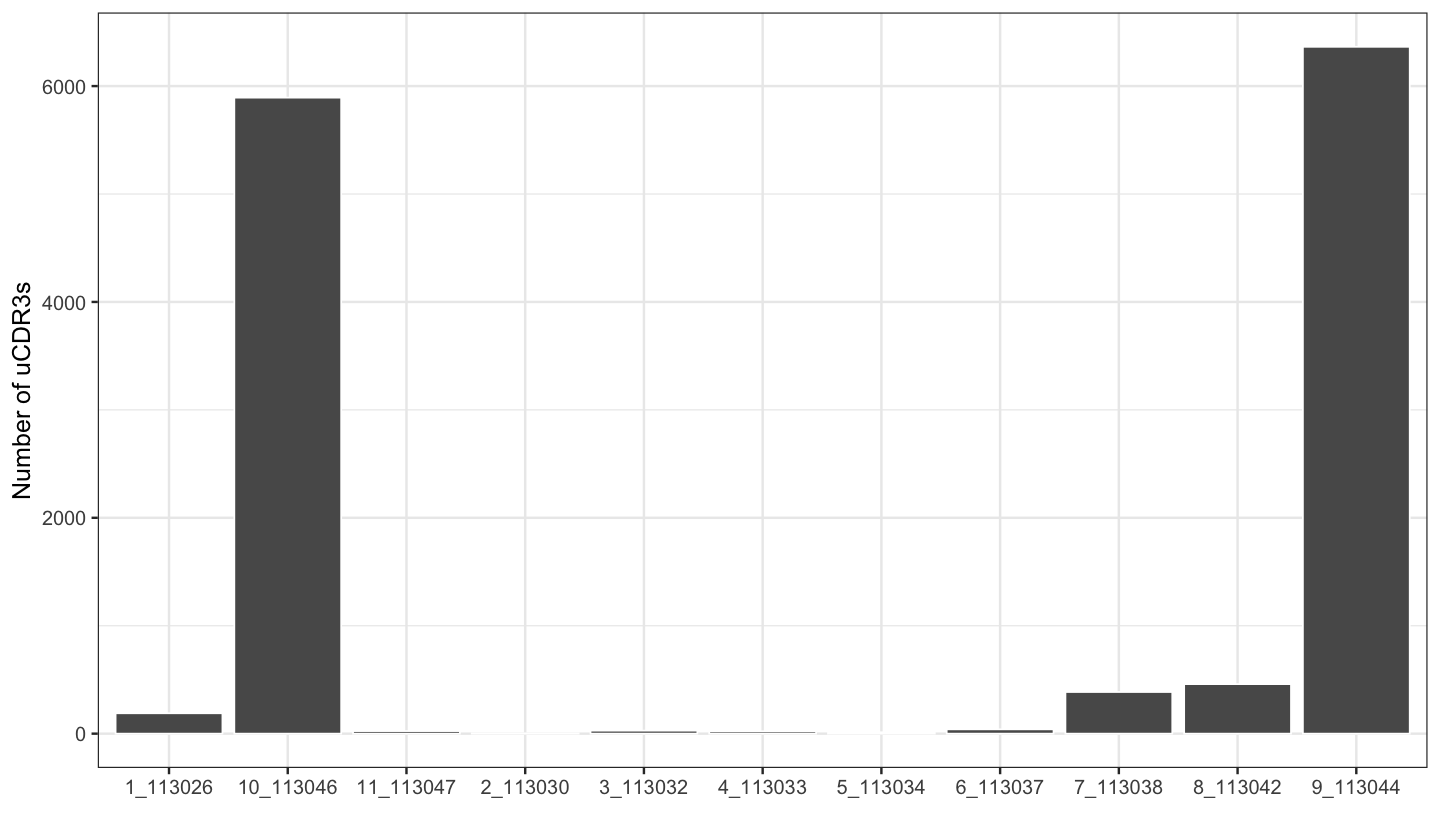

In [20]:
options(repr.plot.width=12, repr.plot.heigh=10)

all_tra_combined_tbl %>%
    distinct(`cellecta_sample_name`, `aaSeqCDR3`) %>%
    count(`cellecta_sample_name`) %>%
    ggplot(aes(x=`cellecta_sample_name`, y=`n`)) +
        geom_col(position='dodge', color='white') +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Number of uCDR3s'
        )

options(org_opts)

In [14]:
all_tra_combined_tbl %>%
    filter(`is_MAIT`)

cellecta_sample_name,cloneId,readCount,readFraction,uniqueMoleculeCount,uniqueMoleculeFraction,targetSequences,targetQualities,allVHitsWithScore,allDHitsWithScore,⋯,allVAlignments,allDAlignments,allJAlignments,allCAlignments,nSeqCDR3,minQualCDR3,aaSeqCDR3,refPoints,file_name,is_MAIT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>
1_113026,4,52060,0.014790643,3,0.015306122,TGCATCGTCGCCTTCAAAGCTGCAGGCAACAAGCTAACTTTT,[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[,TRAV26-1*00(551.5),NA,⋯,332|341|368|0|9||90.0,NA,23|52|83|13|42||290.0,NA,TGCATCGTCGCCTTCAAAGCTGCAGGCAACAAGCTAACTTTT,58,CIVAFKAAGNKLTF,:::::::::0:-7:9:::::13:-3:42:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,58,28829,0.008190538,1,0.005102041,TGTGCTGTCAAGAATGCAGGCAACATGCTCACCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV41*00(600.3),NA,⋯,344|354|376|0|10||100.0,NA,25|52|83|9|36|ST27G|241.0,NA,TGTGCTGTCAAGAATGCAGGCAACATGCTCACCTTT,45,CAVKNAGNMLTF,:::::::::0:-2:10:::::9:-5:36:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,141,27821,0.007904158,1,0.005102041,TGTGCCGTGAACCAGGCAGGAACTGCTCTGATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV12-2*00(938.1),NA,⋯,350|362|383|0|12||120.0,NA,22|49|80|9|36||270.0,NA,TGTGCCGTGAACCAGGCAGGAACTGCTCTGATCTTT,45,CAVNQAGTALIF,:::::::::0:-1:12:::::9:-2:36:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,70,27329,0.007764377,1,0.005102041,TGTGCTGTGGGGGTTAATAACAATGACATGCGCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV36DV7*00(470.1),NA,⋯,347|360|380|0|13|SA357G|101.0,NA,22|43|74|15|36||210.0,NA,TGTGCTGTGGGGGTTAATAACAATGACATGCGCTTT,45,CAVGVNNNDMRF,:::::::::0:0:13:::::15:-2:36:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,319,26777,0.007607550,1,0.005102041,TGTGCAGGAGCTCGCCAGGCAGGAACTGCTCTGATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV27*00(645.7),NA,⋯,338|351|368|0|13||130.0,NA,24|49|80|14|39||250.0,NA,TGTGCAGGAGCTCGCCAGGCAGGAACTGCTCTGATCTTT,45,CAGARQAGTALIF,:::::::::0:3:13:::::14:-4:39:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,321,26031,0.007395605,1,0.005102041,TGTGCAGAGGCCAACCAGGCAGGAACTGCTCTGATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV5*00(446.6),NA,⋯,347|356|380|0|9||90.0,NA,18|49|80|8|39||310.0,NA,TGTGCAGAGGCCAACCAGGCAGGAACTGCTCTGATCTTT,45,CAEANQAGTALIF,:::::::::0:-4:9:::::8:2:39:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,325,25950,0.007372593,1,0.005102041,TGTGCAGAGAGTAACGACTACAAGCTCAGCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV5*00(486.8),NA,⋯,347|360|380|0|13||130.0,NA,24|46|77|11|33||220.0,NA,TGTGCAGAGAGTAACGACTACAAGCTCAGCTTT,45,CAESNDYKLSF,:::::::::0:0:13:::::11:-4:33:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,307,25558,0.007261222,1,0.005102041,TGTGCAGCAAGTAAGGGATCCGGGTATGCACTCAACTTC,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV13-1*00(604.8),NA,⋯,344|357|377|0|13||130.0,NA,30|51|82|18|39||210.0,NA,TGTGCAGCAAGTAAGGGATCCGGGTATGCACTCAACTTC,45,CAASKGSGYALNF,:::::::::0:0:13:::::18:-10:39:::,1_113026.clones_TRAD.tsv,TRUE
1_113026,350,23010,0.006537316,1,0.005102041,TGTGCAACGATCTCCTCAGGAACCTACAAATACATCTTT,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN,TRAV12-3*00(890.4),NA,⋯,350|360|383|0|10|ST357C|71.0,NA,24|50|81|13|39||260.0,NA,TGTGCAACGATCTCCTCAGGAACCTACAAATACATCTTT,45,CATISSGTYKYIF,:::::::::0:-3:10:::::13:-4:39:::,1_113026.clones_TRAD.tsv,TRUE


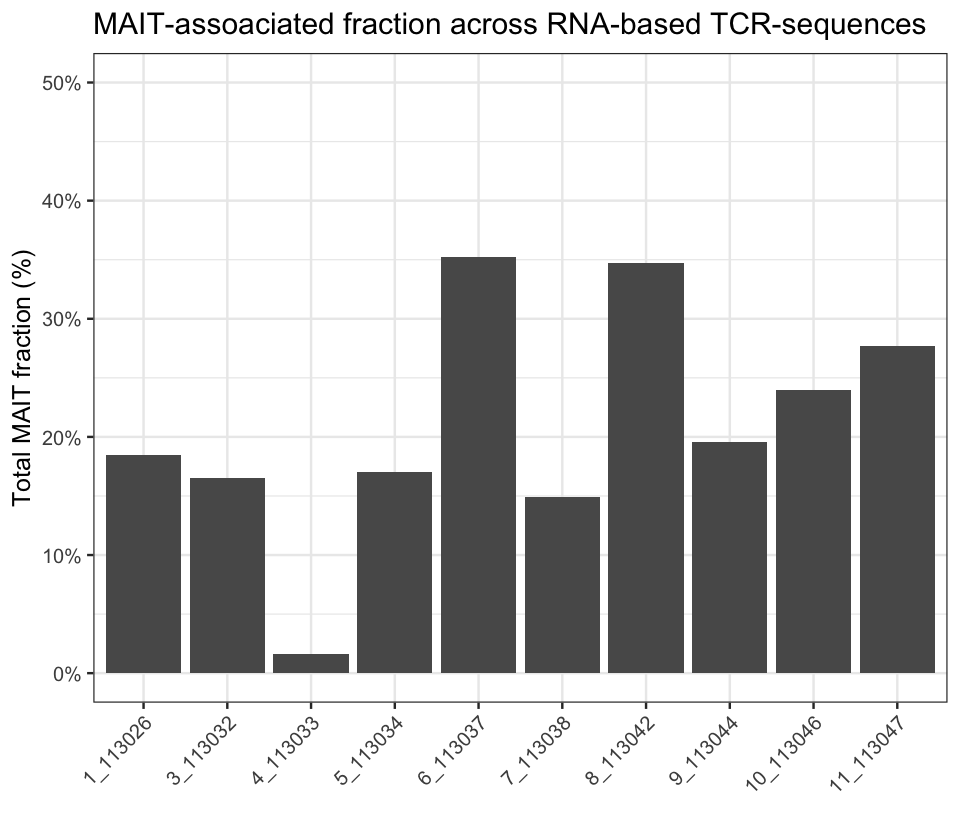

In [23]:
options(repr.plot.width=8, repr.plot.heigh=8)

all_tra_combined_tbl %>%
    group_by(`cellecta_sample_name`, `is_MAIT`) %>%
    summarize(`total_frac`=sum(`readFraction`), .groups='drop') %>%
    filter(`is_MAIT`) %>%
    mutate(
        `cellecta_order`=
            `cellecta_sample_name` %>%
                str_replace_all('_.*', '') %>%
                parse_integer(),
        `cellecta_sample_name`=fct_reorder(`cellecta_sample_name`, `cellecta_order`)
    ) %>%
    ggplot(aes(x=`cellecta_sample_name`, y=`total_frac`)) +
        geom_col() +
        theme_bw(base_size=15) +
        labs(
            title='MAIT-assoaciated fraction across RNA-based TCR-sequences',
            x='',
            y='Total MAIT fraction (%)'
        ) +
        scale_y_continuous(labels=scales::percent, limits=c(0, .5)) +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))

options(org_opts)

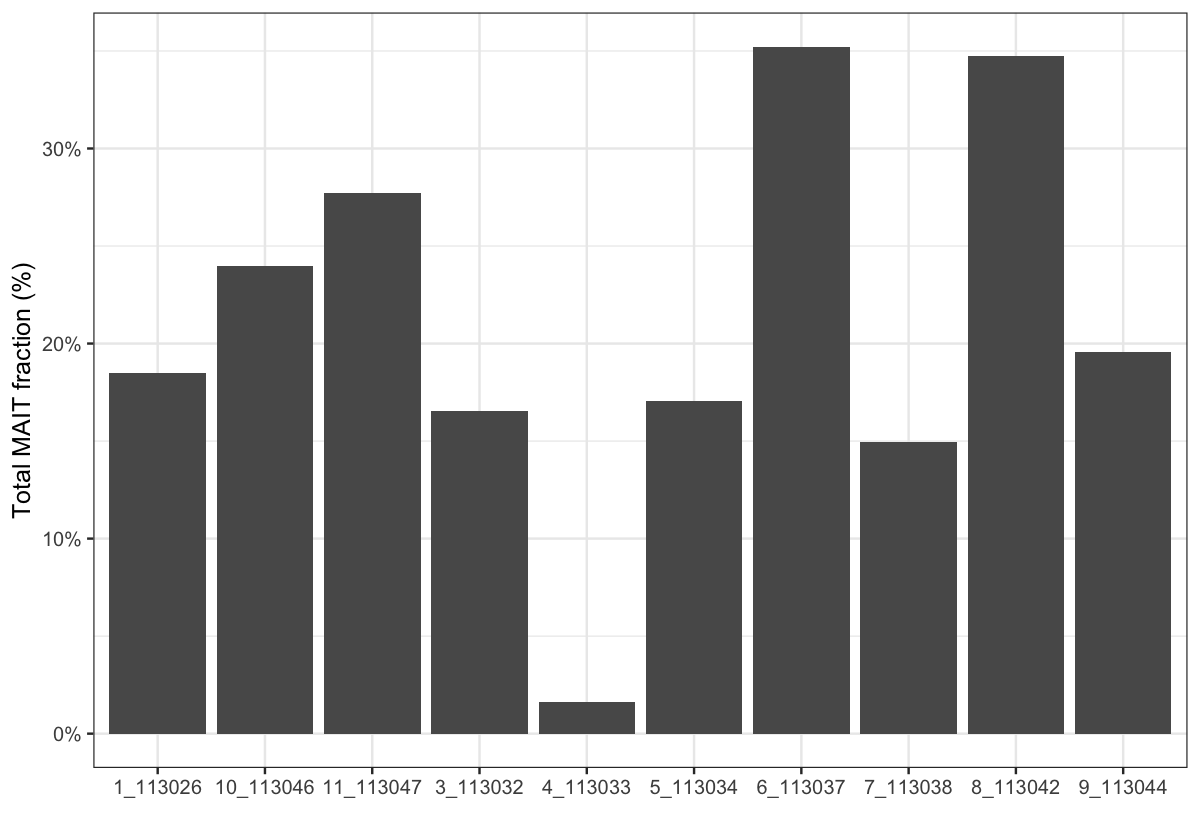

In [15]:
options(repr.plot.width=10, repr.plot.heigh=10)

all_tra_combined_tbl %>%
    group_by(`cellecta_sample_name`, `is_MAIT`) %>%
    summarize(`total_frac`=sum(`readFraction`), .groups='drop') %>%
    filter(`is_MAIT`) %>%
    ggplot(aes(x=`cellecta_sample_name`, y=`total_frac`)) +
        geom_col() +
        theme_bw(base_size=15) +
        labs(
            x='',
            y='Total MAIT fraction (%)'
        ) +
        scale_y_continuous(labels=scales::percent)

options(org_opts)

In [19]:
all_tra_combined_tbl %>%
    distinct(`cellecta_sample_name`, `aaSeqCDR3`, `is_MAIT`) %>%
    count(`aaSeqCDR3`, `is_MAIT`, sort=TRUE) %>%
    filter(`n` > 2)

aaSeqCDR3,is_MAIT,n
<chr>,<lgl>,<int>
CAVMDSNYQLIW,TRUE,6
CAAMDSNYQLIW,TRUE,5
CAGMDSNYQLIW,TRUE,4
CAVMDSSYKLIF,TRUE,4
CAVRDSNYQLIW,TRUE,4
CAASGAGSYQLTF,FALSE,3
CALSDQGYSTLTF,FALSE,3
CALTGANNLFF,FALSE,3
CAPYSGAGSYQLTF,FALSE,3


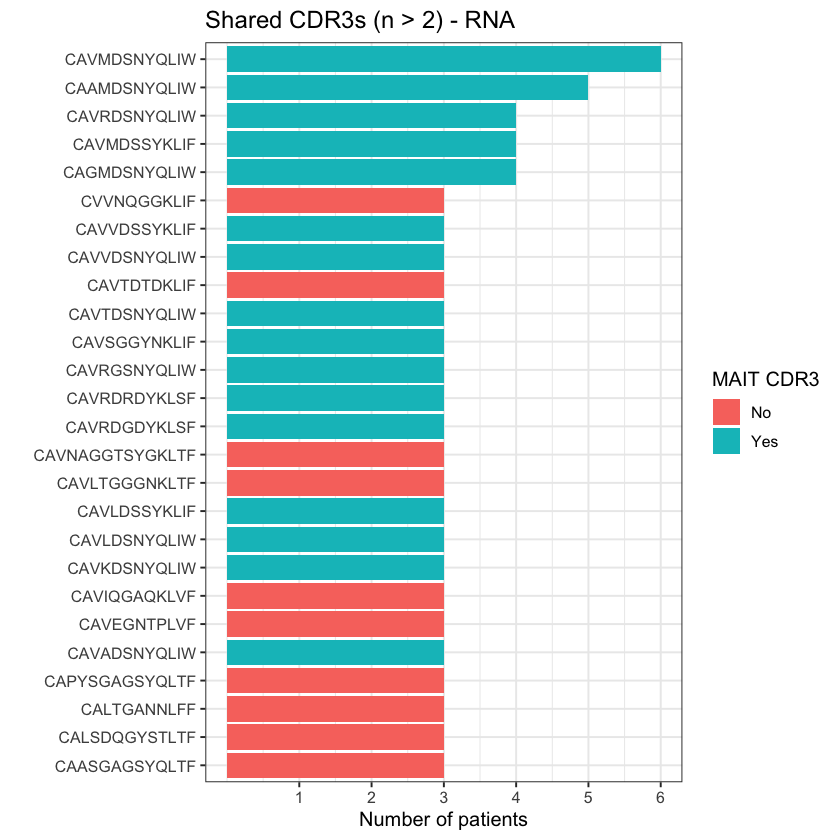

In [21]:
all_tra_combined_tbl %>%
    distinct(`cellecta_sample_name`, `aaSeqCDR3`, `is_MAIT`) %>%
    count(`aaSeqCDR3`, `is_MAIT`, sort=TRUE) %>%
    filter(`n` > 2) %>%
    mutate(
        `aaSeqCDR3`=fct_reorder(`aaSeqCDR3`, `n`),
        `is_MAIT`=if_else(`is_MAIT`, 'Yes', 'No')
    ) %>%
    ggplot(aes(x=`n`, y=`aaSeqCDR3`, fill=`is_MAIT`)) +
        geom_col() +
        scale_x_continuous(breaks=c(1:10)) +
        theme_bw(base_size=12) +
        labs(
            title='Shared CDR3s (n > 2) - RNA',
            fill='MAIT CDR3',
            x='Number of patients',
            y=''
        )
        